In [ ]:
import json
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [ ]:
def lire_fichier (chemin):
    with open(chemin) as json_data: 
        texte =json.load(json_data)
    return texte

../ELTeC-fra_09072024_EVAL_char2-3/ADAM/OCR/ADAM_TesseractFra-PNG-jspll-ELTeC/NER/SIM/sim_ADAM_Mon-village_TesseractFra-PNG-jspll-ELTeC.txt_lg.json-EN-concat.json
Version :  Tess. fr -- jspl-ELTeCfr
../ELTeC-fra_09072024_EVAL_char2-3/ADAM/OCR/ADAM_TesseractFra-PNG-jspll-ELTeC/NER/SIM/sim2-3_ADAM_Mon-village_TesseractFra-PNG-jspll-ELTeC.txt_lg.json-EN-concat.json
Version :  Tess. fr -- jspl-ELTeCfr
../ELTeC-fra_09072024_EVAL_char2-3/ADAM/OCR/ADAM_TesseractFra-PNG-jspll-pretrain/NER/SIM/sim_ADAM_Mon-village_TesseractFra-PNG-jspll-pretrain.txt_lg.json-EN-concat.json
Version :  Tess. fr -- jspl-fr
../ELTeC-fra_09072024_EVAL_char2-3/ADAM/OCR/ADAM_TesseractFra-PNG-jspll-pretrain/NER/SIM/sim2-3_ADAM_Mon-village_TesseractFra-PNG-jspll-pretrain.txt_lg.json-EN-concat.json
Version :  Tess. fr -- jspl-fr
../ELTeC-fra_09072024_EVAL_char2-3/ADAM/OCR/ADAM_TesseractFra-PNG/NER/SIM/sim_ADAM_Mon-village_TesseractFra-PNG.txt_lg.json-EN-concat.json
Version :  Tess. fr
../ELTeC-fra_09072024_EVAL_char2-3/AD

,Auteur,Configuration,Distance,Metric
131,NOAILLES,Kraken,0.335607,cosinus
95,DAUDET,Kraken,0.038865,cosinus
106,FLAUBERT,Kraken,0.016235,cosinus
107,FLAUBERT,Kraken,0.096624,cosinus
46,AUDOUX,Kraken,0.059149,cosinus
...,...,...,...,...
75,DASH,Tess. fr -- jspl-fr,0.274616,cosinus
38,AUDOUX,Tess. fr -- jspl-fr,0.074879,cosinus
39,AUDOUX,Tess. fr -- jspl-fr,0.362965,cosinus
15,AIMARD-RIVIERE,Tess. fr -- jspl-fr,0.029382,cosinus


/tmp/ipykernel_8148/385715571.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Distance",  y="Configuration", data=data_tab,
/tmp/ipykernel_8148/385715571.py:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="Distance", y="Configuration", data=data_tab,


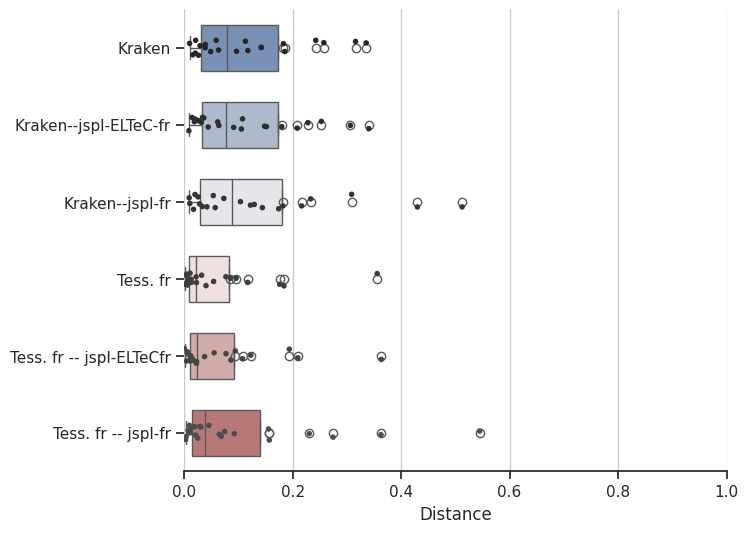

In [23]:
tableau={}
liste_auteur=[]
liste_version_spacy=[]
liste_config=[]
liste_dist=[]
liste_auteur=[]
liste_name_metric=[]
liste_version=[]
liste_vers_ocr=["kraken","Kraken-base.txt","kraken-jspll-pretrain","tesseract","tesseract-jspll-pretrain",]


# path_data = "../ELTeC-fra_09072024_EVAL_char2-3/*/OCR/*/SIM/*.json"
path_data = "../ELTeC-fra_09072024_EVAL_char2-3/*/OCR/*/NER/SIM/*.json"

for path in glob.glob(path_data):
    print(path)
    
    
    # # for dist_file in glob.glob(f"{path_autor}/*.json"):
    # # print(dist_file)
    
    autor=path.split("/")[4]
    autor=autor.split("_")[0]
    # print(autor)
    version=path.split("/")[4]
    version=version.split("_")[-1]
    # print(version)
    distance=lire_fichier(path)
    # print(distance)

    if version=="Kraken-base.txt" or version=="kraken" :
        version=re.sub("Kraken-base.txt|kraken","Kraken",version)
        print("Version : ", version)
    if version=="kraken-jspll-pretrain.txt" or version=="kraken-jspll-pretrain":
        version=re.sub("kraken-jspll-pretrain.txt|kraken-jspll-pretrain","Kraken--jspl-fr",version)
        print("Version : ", version)
    if version=="kraken-jspll-ELTeC.txt" or version=="kraken-jspll-ELTeC" :
        version=re.sub("kraken-jspll-ELTeC.txt|kraken-jspll-ELTeC","Kraken--jspl-ELTeC-fr",version)
        print("Version : ", version)
    
    if version=="TesseractFra-PNG.txt" or version=="TesseractFra-PNG" or version=="tesseract":
        version=re.sub("TesseractFra-PNG.txt|TesseractFra-PNG|tesseract","Tess. fr",version)
        print("Version : ", version)
    if version=="TesseractFra-PNG-jspll-pretrain.txt" or version=="TesseractFra-PNG-jspll-pretrain" or version=="tesseract-jspll-pretrain":
        version=re.sub("TesseractFra-PNG-jspll-pretrain.txt|TesseractFra-PNG-jspll-pretrain|tesseract-jspll-pretrain","Tess. fr -- jspl-fr",version)
        print("Version : ", version)
    if version=="TesseractFra-PNG-jspll-ELTeC.txt" or version=="TesseractFra-PNG-jspll-ELTeC":
        version=re.sub("TesseractFra-PNG-jspll-ELTeC.txt|TesseractFra-PNG-jspll-ELTeC","Tess. fr -- jspl-ELTeCfr",version)
        print("Version : ", version)
    
    
    
    liste_distance=[]
    for key, res_dist in distance.items():
        # print("Key : ",key)
        if key == "cosinus":
            # print("distance %s : "%key,res_dist)
        
#         # for paire, resultats in config.items():
#         #     if paire=="spacy-lg-concat--spacy-lg-concat":
#         #         paire=re.sub("spacy-lg-concat--spacy-lg-concat","spaCy_lg",paire)
#         #     if paire=="spacy-md-concat--spacy-md-concat":
#         #         paire=re.sub("spacy-md-concat--spacy-md-concat","spaCy_md",paire)
#         #     if paire=="spacy-sm-concat--spacy-sm-concat":
#         #         paire=re.sub("spacy-sm-concat--spacy-sm-concat","spaCy_sm",paire)
#         #     if "PP" in paire:
#         #         paire=re.sub("PP","Réf",paire)
            
            
            
#             # for name_metric, liste in resultats.items():
#                 # print(liste)
                
            for r in res_dist:
                #     if paire =="spaCy_lg" and name_metric=="cosinus":#or paire=="sm--sm" or paire=="md--md":
                liste_name_metric.append(key)
                # liste_version.append(version)
                liste_config.append(version)#+"--"+paire)
                liste_auteur.append(autor)
                # liste_version_spacy.append(version_spacy)
                liste_dist.append(r)
# print(liste_dist)
            
                
    

tableau["Auteur"]=liste_auteur
# tableau["Version"]=liste_version
tableau["Configuration"]=liste_config
tableau["Distance"]=liste_dist
tableau["Metric"]=liste_name_metric
# tableau["Version_spacy"]=liste_version_spacy
data_tab = pd.DataFrame(tableau)
data_tab=data_tab.sort_values(by = 'Configuration')
display(data_tab)


sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("linear")

# Load the example planets dataset
# planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
# sns.boxplot(x=data_tab.Distance[(data_tab.Metric=="cosinus") & (data_tab.Configuration=="kraken--lg--lg")],  y=data_tab.Configuration[data_tab.Configuration=="kraken--lg--lg"], data=data_tab,
#             whis=[0, 100], width=.6, palette="vlag")
sns.boxplot(x="Distance",  y="Configuration", data=data_tab,
            whis=[0, 1], width=.6, palette="vlag")#, legend=False)

# Add in points to show each observation
# sns.stripplot(x=data_tab.Distance[(data_tab.Metric=="cosinus") & (data_tab.Configuration=="kraken--lg--lg")], y=data_tab.Configuration[data_tab.Configuration=="kraken--lg--lg"], data=data_tab,
#               size=4, color=".3", linewidth=0)
sns.stripplot(x="Distance", y="Configuration", data=data_tab,
              size=4, palette='dark:.3', linewidth=0)#, legend=False)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
plt.xlim([0,1])



sns.despine(trim=True, left=True)
plt.savefig("../Boite-a_moustache/ELTeCfra_spacy-lg_2-3-cosinus.png",dpi=300, bbox_inches="tight")

In [28]:
!python --version

Python 3.12.4
